<a href="https://colab.research.google.com/github/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/blob/BHOOMI_202218063/EDA_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [484]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

import math
from tabulate import tabulate

#Loading dataset

In [485]:
#Reading csv from Github repository
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/dataset.csv")

In [486]:
data.shape

(53392, 33)

In [487]:
data.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [488]:
col = data.columns
col

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [489]:
df = data[['YearEnd','LocationAbbr','LocationID','GeoLocation' ,'Sample_Size','Age(years)','Education','Gender','Income','Race/Ethnicity','Total','ClassID','Question','QuestionID','StratificationCategory1','Stratification1','StratificationCategoryId1','StratificationID1','Low_Confidence_Limit', 'High_Confidence_Limit ','Data_Value']]

In [490]:
df.head(1)

,YearEnd,LocationAbbr,LocationID,GeoLocation,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,...,ClassID,Question,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Low_Confidence_Limit,High_Confidence_Limit,Data_Value
0,2011,AL,1,"(32.84057112200048, -86.63186076199969)",7304.0,NaN,NaN,NaN,NaN,NaN,...,OWS,Percent of adults aged 18 years and older who ...,Q036,Total,Total,OVR,OVERALL,30.5,33.5,32.0


In [491]:
df.columns = df.columns.str.lower()

In [492]:
distinct_values = df['stratificationcategoryid1'].unique()
distinct_values

array(['OVR', 'GEN', 'EDU', 'AGEYR', 'INC', 'RACE'], dtype=object)

# Dataframes from different stratification category

In [493]:
total = df[df['stratificationcategoryid1'] == 'OVR'] # total
gen = df[df['stratificationcategoryid1'] == 'GEN'] #gender
edu  = df[df['stratificationcategoryid1'] == 'EDU'] #Education
age = df[df['stratificationcategoryid1'] == 'AGEYR'] #Age Range of sample
inc  = df[df['stratificationcategoryid1'] == 'INC'] #income range
race = df[df['stratificationcategoryid1'] == 'RACE'] # race

In [494]:
total.head(1)

,yearend,locationabbr,locationid,geolocation,sample_size,age(years),education,gender,income,race/ethnicity,...,classid,question,questionid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1,low_confidence_limit,high_confidence_limit,data_value
0,2011,AL,1,"(32.84057112200048, -86.63186076199969)",7304.0,NaN,NaN,NaN,NaN,NaN,...,OWS,Percent of adults aged 18 years and older who ...,Q036,Total,Total,OVR,OVERALL,30.5,33.5,32.0


##Size of all category data

In [495]:
dataframes = [race, inc, age, edu, gen, total]
categories = ['race', 'income', 'age', 'education', 'gender', 'total']

**Size of all dataframes**

In [496]:
for i, category in zip(dataframes, categories):
    print(f'Shape of category {category}:{i.shape} ')
    print()

Shape of category race:(15256, 21) 

Shape of category income:(13349, 21) 

Shape of category age:(11438, 21) 

Shape of category education:(7628, 21) 

Shape of category gender:(3814, 21) 

Shape of category total:(1907, 21) 



## Missing Values

In [497]:
missing_values_list = []
for i, category in zip(dataframes, categories):
    missing_values = i.isnull().sum()
    missing_values_list.append(missing_values)

missing_values_df = pd.concat(missing_values_list, axis=1)
missing_values_df.columns = categories

print("Missing values in DataFrames:")
print(missing_values_df)

Missing values in DataFrames:
                            race  income    age  education  gender  total
yearend                        0       0      0          0       0      0
locationabbr                   0       0      0          0       0      0
locationid                     0       0      0          0       0      0
geolocation                  288     252    216        144      72     36
sample_size                 5046       0      0          0       0      0
age(years)                 15256   13349      0       7628    3814   1907
education                  15256   13349  11438          0    3814   1907
gender                     15256   13349  11438       7628       0   1907
income                     15256       0  11438       7628    3814   1907
race/ethnicity                 0   13349  11438       7628    3814   1907
total                      15256   13349  11438       7628    3814      0
classid                        0       0      0          0       0      0
question

  **For race sample_size and data_value is also null so we will remove those values also**

In [498]:
race= race.dropna(subset=['data_value'])
race.shape

(10210, 21)

In [499]:
# Drop missing values in the 'geolocation' column for each DataFrame
race = race.dropna(subset=['geolocation'])
inc= inc.dropna(subset=['geolocation'])
age = age.dropna(subset=['geolocation'])
edu = edu.dropna(subset=['geolocation'])
gen = gen.dropna(subset=['geolocation'])
total = total.dropna(subset=['geolocation'])

###OBSERVATION:
*   From the above null values we know that for each category other categories values(column) are null so we will remove those feature for particular dataframe.
*   Eg. for race total category other categories(age, education, gender, income, race) are null.

### Dropping Missing values
(According to above observation)

In [500]:
# Drop specified columns from each DataFrame
total = total.drop(['income', 'age(years)', 'gender', 'education', 'total', 'race/ethnicity'], axis=1)
gen = gen.drop(['income', 'age(years)', 'gender', 'education', 'total', 'race/ethnicity'], axis=1)
edu = edu.drop(['income', 'age(years)', 'gender', 'education', 'total', 'race/ethnicity'], axis=1)
age = age.drop(['income', 'age(years)', 'gender', 'education', 'total', 'race/ethnicity'], axis=1)
inc = inc.drop(['income', 'age(years)', 'gender', 'education', 'total', 'race/ethnicity'], axis=1)
race = race.drop(['income', 'age(years)', 'gender', 'education', 'total', 'race/ethnicity'], axis=1)

In [501]:
dataframes = [race, inc, age, edu, gen, total]

In [502]:
for i, category in zip(dataframes, categories):
    print(f'Shape of category {category}:{i.shape} ')
    print()

Shape of category race:(9922, 15) 

Shape of category income:(13097, 15) 

Shape of category age:(11222, 15) 

Shape of category education:(7484, 15) 

Shape of category gender:(3742, 15) 

Shape of category total:(1871, 15) 



In [503]:
for i, df in enumerate(dataframes, start=1):
    null_count = df.isnull().sum().sum()
    print(f"Null values in df{i}: {null_count}")

Null values in df1: 0
Null values in df2: 0
Null values in df3: 0
Null values in df4: 0
Null values in df5: 0
Null values in df6: 0


**Now we don't have any null values in our datasets.**

In [504]:
total.describe()

,yearend,locationid,sample_size,low_confidence_limit,high_confidence_limit,data_value
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,2013.282202,29.727418,8435.730091,29.544094,32.659433,31.080011
std,1.693807,16.504820,4378.030616,8.908179,9.135518,9.023416
min,2011.000000,1.000000,1203.000000,7.200000,9.100000,8.100000
25%,2012.000000,16.500000,5475.000000,23.000000,26.050000,24.500000
50%,2013.000000,29.000000,7231.000000,28.700000,31.900000,30.300000
75%,2015.000000,42.000000,10479.000000,34.100000,37.300000,35.700000
max,2016.000000,78.000000,36868.000000,62.200000,65.900000,64.100000


# Histogram and Boxplot for data value

In [505]:
# Create a histogram
fig = px.histogram(total, x='data_value', nbins=10, marginal='box', title='Histogram of Data_Value in Total category')
fig.update_layout(
    xaxis_title='data_value',
    yaxis_title='Count',
    showlegend=False
)

# Display plots
fig.show()

**Observation:**

This plot shows count vs data value for the total category. The majority of obesity rates fall within the range of 24.5 to 35.7, which corresponds to the first quartile (Q1) and the third quartile (Q3).

In [506]:
# Create a histogram
fig = px.histogram(race, x='data_value', nbins=10, marginal='box', title='Histogram of Data_Value in Race/Ethnicity category')
fig.update_layout(
    xaxis_title='data_value',
    yaxis_title='Count',
    showlegend=False
)

# Display plots
fig.show()

**Observation:**

This plot shows count vs data value for the Race/Ethnicity category. The majority of obesity rates fall within the range of 24 to 37.2, which corresponds to the first quartile (Q1) and the third quartile (Q3).

In [507]:
# Create a histogram
fig = px.histogram(edu, x='data_value', nbins=10, marginal='box', title='Histogram of Data_Value in Education category')
fig.update_layout(
    xaxis_title='data_value',
    yaxis_title='Count',
    showlegend=False
)

# Display plots
fig.show()

**Observation:**

This plot shows count vs data value for the Education category. The majority of obesity rates fall within the range of 24.3 to 36.9, which corresponds to the first quartile (Q1) and the third quartile (Q3).

In [508]:
# Create a histogram
fig = px.histogram(inc, x='data_value', nbins=10, marginal='box', title='Histogram of Data_Value in Income category')
fig.update_layout(
    xaxis_title='data_value',
    yaxis_title='Count',
    showlegend=False
)

# Display plots
fig.show()

**Observation:**

This plot shows count vs data value for the Income category. The majority of obesity rates fall within the range of 24.6 to 36.8, which corresponds to the first quartile (Q1) and the third quartile (Q3).

In [509]:
# Identify and display outliers using the IQR method
data_values = total['data_value']
Q1 = data_values.quantile(0.25)
Q3 = data_values.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = total[(data_values < lower_bound) | (data_values > upper_bound)]
print("Outliers in 'Data_Value' column:")
print(outliers)

Outliers in 'Data_Value' column:
       yearend locationabbr  locationid  \
795       2011           AK           2   
1156      2013           AK           2   
1465      2011           AZ           4   
2814      2011           CA           6   
3173      2013           CA           6   
...        ...          ...         ...   
44394     2015           UT          49   
44535     2015           VT          50   
44815     2015           WA          53   
45095     2015           WI          55   
45235     2015           WY          56   

                                     geolocation  sample_size classid  \
795     (64.84507995700051, -147.72205903599973)       3212.0      PA   
1156    (64.84507995700051, -147.72205903599973)       4127.0      PA   
1465   (34.865970280000454, -111.76381127699972)       5996.0      PA   
2814    (37.63864012300047, -120.99999953799971)      16760.0      PA   
3173    (37.63864012300047, -120.99999953799971)      10078.0      PA   
...         

**Number of outliers in the total categories**

# Obesity rate by subcategory of age, income, gender, education, Race/Ethnicity

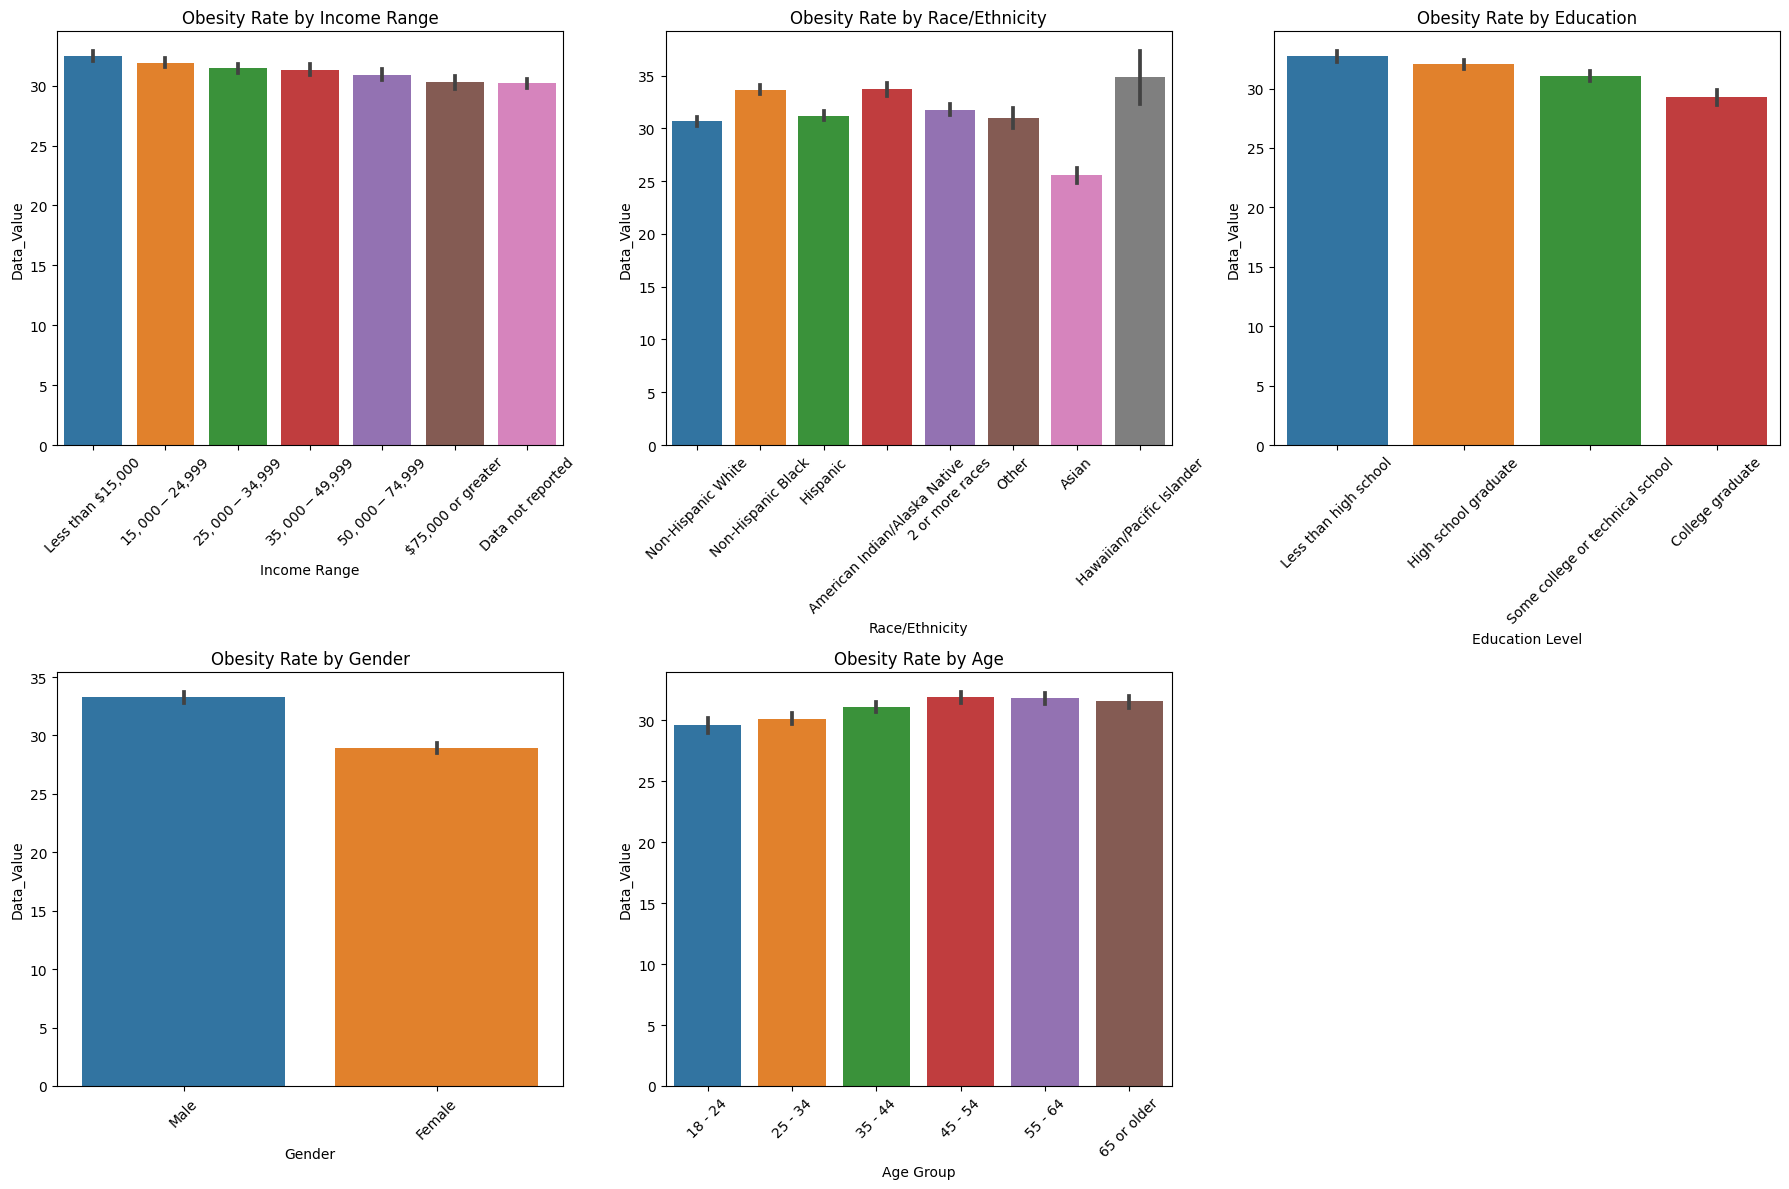

In [510]:
# subplot with a 2x3 grid layout
plt.figure(figsize=(18, 12))

# Plot 1
plt.subplot(2, 3, 1)
sns.barplot(x='stratification1', y='data_value', data=inc)
plt.title('Obesity Rate by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Data_Value')
plt.xticks(rotation=45)

# Plot 2
plt.subplot(2, 3, 2)
sns.barplot(x='stratification1', y='data_value', data=race)
plt.title('Obesity Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Data_Value')
plt.xticks(rotation=45)

# Plot 3
plt.subplot(2, 3, 3)
sns.barplot(x='stratification1', y='data_value', data=edu)
plt.title('Obesity Rate by Education')
plt.xlabel('Education Level')
plt.ylabel('Data_Value')
plt.xticks(rotation=45)

# Plot 4
plt.subplot(2, 3, 4)
sns.barplot(x='stratification1', y='data_value', data=gen)
plt.title('Obesity Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Data_Value')
plt.xticks(rotation=45)

# Plot 5
plt.subplot(2, 3, 5)
sns.barplot(x='stratification1', y='data_value', data=age)
plt.title('Obesity Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Data_Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Observation:**

Income: It is evident that there is an inverse relationship between income and obesity rates, as obesity rates tend to decrease with increasing income levels.

Race/Ethnicity: Obesity rates vary significantly among different racial and ethnic groups, with the lowest rates observed in the Asian population and the highest rates among Hawaiian/Pacific Islanders.

Education: There is a noticeable trend where obesity rates decrease as education levels increase, ranging from less than high school to college graduate.

Gender: Females exhibit lower obesity rates compared to males.

Age: There are relatively minor differences in obesity rates among different age groups, including young adults aged 18-24, 25-34, and 45-54.




#scatter plot of sample size and data value

In [511]:
# sum of 'sample_size' for each DataFrame and associate it with the category
sample_size_sums = {}
for category, df in zip(categories, dataframes):
    sample_size_sum = df['sample_size'].sum()
    sample_size_sums[category] = sample_size_sum

print(" total of the sample size in each stratification category")
for category, sum_value in sample_size_sums.items():

    print(f"Sum of Sample_Size for '{category}': {sum_value}")

 total of the sample size in each stratification category
Sum of Sample_Size for 'race': 15463363.0
Sum of Sample_Size for 'income': 15783251.0
Sum of Sample_Size for 'age': 15765221.0
Sum of Sample_Size for 'education': 15744819.0
Sum of Sample_Size for 'gender': 15783113.0
Sum of Sample_Size for 'total': 15783251.0


**Minor difference in total size of each category because of rows dropped with insufficient sample size.**

In [512]:
# Sample size vs Data value with race and location
# Race/Ethnicity is represented by diff. color and location represented by diff shape.
def plot_scat(frame):
    # scatter plot
    scatter_fig = px.scatter(frame, x='sample_size', y='data_value', color='stratification1', symbol='locationabbr',
                             title='Sample_Size vs. Data_Value by Race/Ethnicity and Location',
                             labels={'sample_size': 'Sample Size', 'data_value': 'Data Value'})
    scatter_fig.update_layout(showlegend=True)
    scatter_fig.show()

plot_scat(race)


**A limited number of samples have a sample size exceeding 20,000. The majority of these samples correspond to the non-Hispanic white demographic group.**

In [513]:
def plot_scat(frame, name):
    # Create a scatter plot to explore the relationship
    scatter_fig = px.scatter(frame, x='sample_size', y='data_value', color='stratification1',
                            title=f'Sample_Size vs. Data_Value by {name}')
    scatter_fig.update_layout(
        xaxis_title='sample_size',
        yaxis_title='data_value',
        showlegend=True)

    # Display the scatter plot
    scatter_fig.show()

In [514]:
plot_scat(race,'Race')

In [515]:
plot_scat(gen,'Gender')

**This scatter plot clearly illustrates that females exhibit lower obesity
rates compared to males.**

In [516]:
plot_scat(inc, 'Income')

In [517]:
plot_scat(edu, 'Education')

**The scatter plots for income and education above reveal a distinct pattern: lower data values are associated with higher income groups and college graduates, respectively.**

# Question and Class count

In [518]:
question_dict = {row['questionid']: row['question'] for index, row in df.iterrows()}

for question_id, question in question_dict.items():
    print(f" {question_id}:{question}")

 Q036:Percent of adults aged 18 years and older who have obesity
 Q037:Percent of adults aged 18 years and older who have an overweight classification
 Q018:Percent of adults who report consuming fruit less than one time daily
 Q019:Percent of adults who report consuming vegetables less than one time daily
 Q043:Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
 Q044:Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
 Q045:Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
 Q046:Percent of adults who engag

In [519]:
def count_qus_class(frame):
    #distribution of survey questions in given category
    question_counts = frame['questionid'].value_counts()
    print("Distribution of Survey Questions:\n")
    print(question_counts,'\n')

    #summary statistics for different classes
    class_summary = frame.groupby('classid')['data_value'].describe()
    print("Summary Statistics by Class:")
    print(class_summary)


In [520]:
count_qus_class(total)

Distribution of Survey Questions:

Q036    314
Q037    314
Q047    313
Q018    155
Q019    155
Q043    155
Q044    155
Q045    155
Q046    155
Name: questionid, dtype: int64 

Summary Statistics by Class:
         count       mean        std   min     25%   50%   75%   max
classid                                                             
FV       310.0  31.313226   9.529595  15.3  22.600  31.3  39.2  55.6
OWS      628.0  32.132325   4.292097  20.2  28.975  33.8  35.6  39.1
PA       933.0  30.294212  10.930864   8.1  22.500  27.6  33.6  64.1


In [521]:
count_qus_class(race)

Distribution of Survey Questions:

Q047    1691
Q036    1679
Q037    1679
Q046     819
Q018     818
Q019     812
Q043     810
Q044     807
Q045     807
Name: questionid, dtype: int64 

Summary Statistics by Class:
          count       mean        std  min   25%   50%     75%   max
classid                                                             
FV       1630.0  31.920491  10.819122  3.6  23.0  32.7  39.975  61.2
OWS      3358.0  31.507445   8.652946  0.9  27.6  32.8  36.700  60.4
PA       4934.0  30.732671  11.594811  2.5  22.4  28.6  36.800  77.6


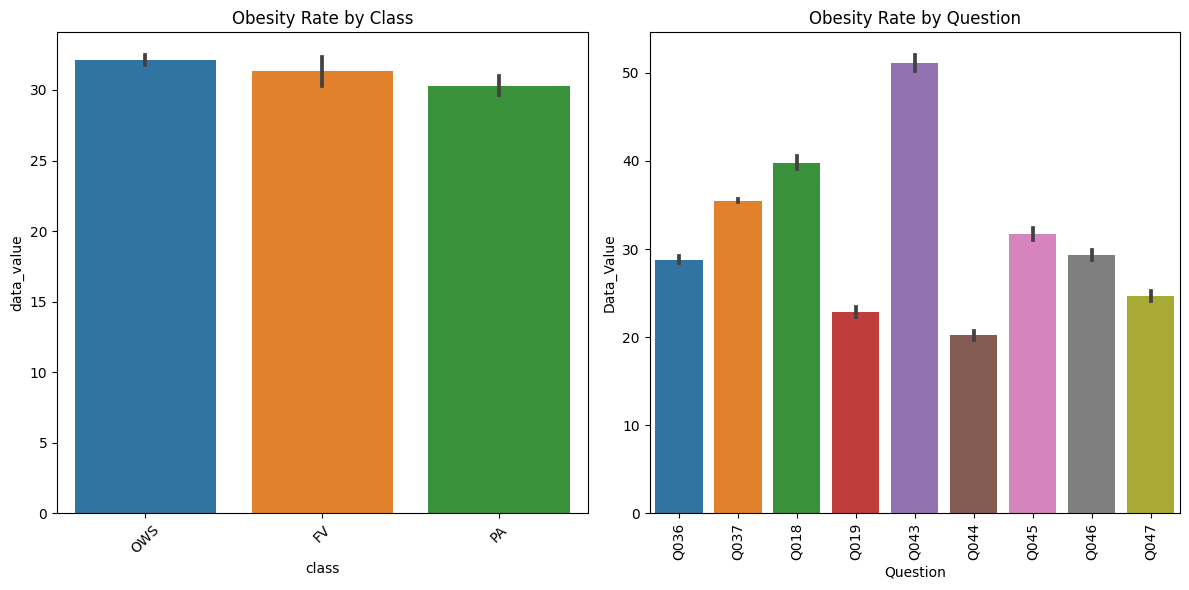

In [522]:
#subplot for Total Values
plt.figure(figsize=(12, 6))

# obesity rates by 'Class'
plt.subplot(1, 2, 1)
sns.barplot(x='classid', y='data_value', data=total)
plt.title('Obesity Rate by Class')
plt.xlabel('class')
plt.ylabel('data_value')
plt.xticks(rotation=45)

# obesity rates by 'Question'
plt.subplot(1, 2, 2)
sns.barplot(x='questionid', y='data_value', data=total)
plt.title('Obesity Rate by Question')
plt.xlabel('Question')
plt.ylabel('Data_Value')
plt.xticks(rotation=90)

# Adjust subplot spacing
plt.tight_layout()

# Display the plots
plt.show()


#Correlation and label encoding

In [523]:
total.corr()

,yearend,locationid,sample_size,low_confidence_limit,high_confidence_limit,data_value
yearend,1.000000,0.046653,-0.113640,-0.006024,0.004500,-0.000733
locationid,0.046653,1.000000,-0.052194,0.000463,-0.001540,-0.000515
sample_size,-0.113640,-0.052194,1.000000,-0.001108,-0.066981,-0.033657
low_confidence_limit,-0.006024,0.000463,-0.001108,1.000000,0.995672,0.998943
high_confidence_limit,0.004500,-0.001540,-0.066981,0.995672,1.000000,0.998875
data_value,-0.000733,-0.000515,-0.033657,0.998943,0.998875,1.000000


In [524]:
encoded_dataframes = {}

#columns to encode
columns_to_encode = ['classid','questionid', 'stratificationid1']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate dataframes and encode the selected columns
for category, i in zip(categories, dataframes):
    encoded_df = i.copy()

    # Encode the selected columns
    for column in columns_to_encode:
        encoded_df[f'{column}_enc'] = label_encoder.fit_transform(encoded_df[column])

    #encoded DataFrame stored in the dictionary
    encoded_dataframes[f'{category}_enc'] = encoded_df
# we can access them using encoded_dataframes['race_enc'], encoded_dataframes['income_enc']


In [525]:
for i in dataframes:
    print(i.columns)

Index(['yearend', 'locationabbr', 'locationid', 'geolocation', 'sample_size',
       'classid', 'question', 'questionid', 'stratificationcategory1',
       'stratification1', 'stratificationcategoryid1', 'stratificationid1',
       'low_confidence_limit', 'high_confidence_limit ', 'data_value'],
      dtype='object')
Index(['yearend', 'locationabbr', 'locationid', 'geolocation', 'sample_size',
       'classid', 'question', 'questionid', 'stratificationcategory1',
       'stratification1', 'stratificationcategoryid1', 'stratificationid1',
       'low_confidence_limit', 'high_confidence_limit ', 'data_value'],
      dtype='object')
Index(['yearend', 'locationabbr', 'locationid', 'geolocation', 'sample_size',
       'classid', 'question', 'questionid', 'stratificationcategory1',
       'stratification1', 'stratificationcategoryid1', 'stratificationid1',
       'low_confidence_limit', 'high_confidence_limit ', 'data_value'],
      dtype='object')
Index(['yearend', 'locationabbr', 'location

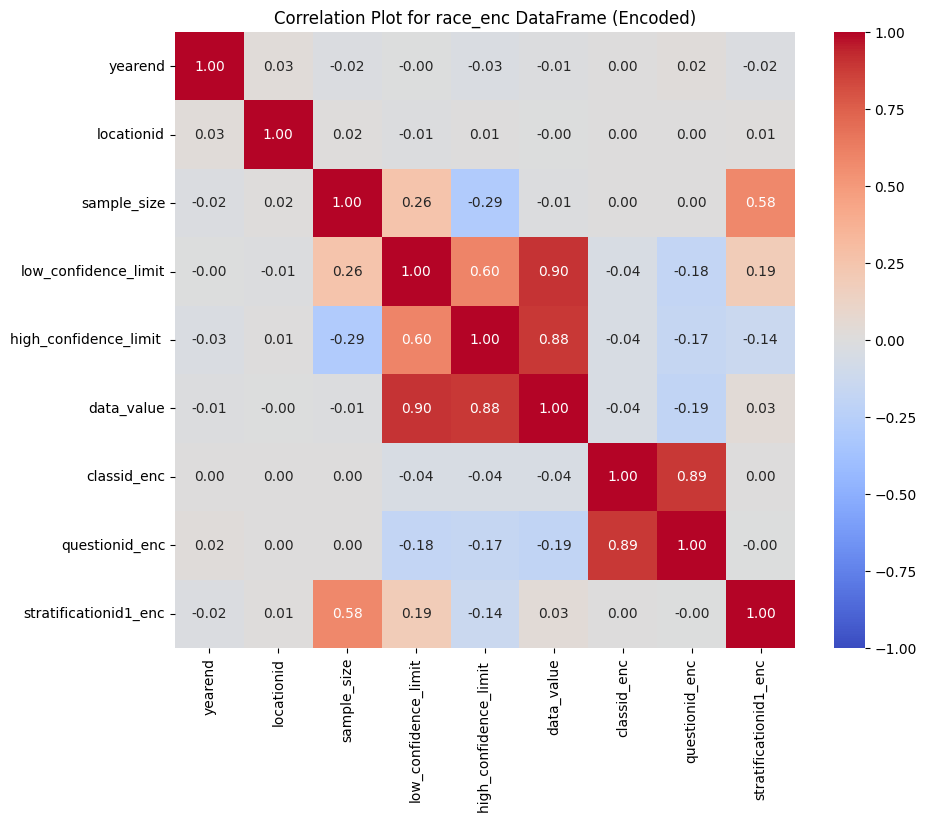

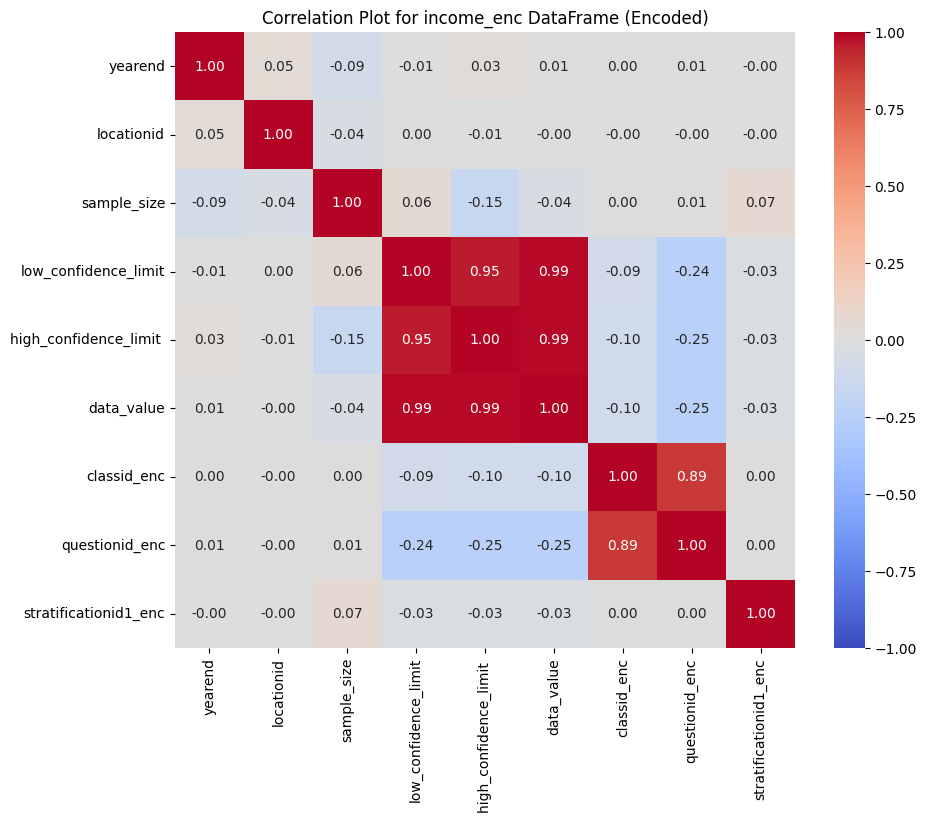

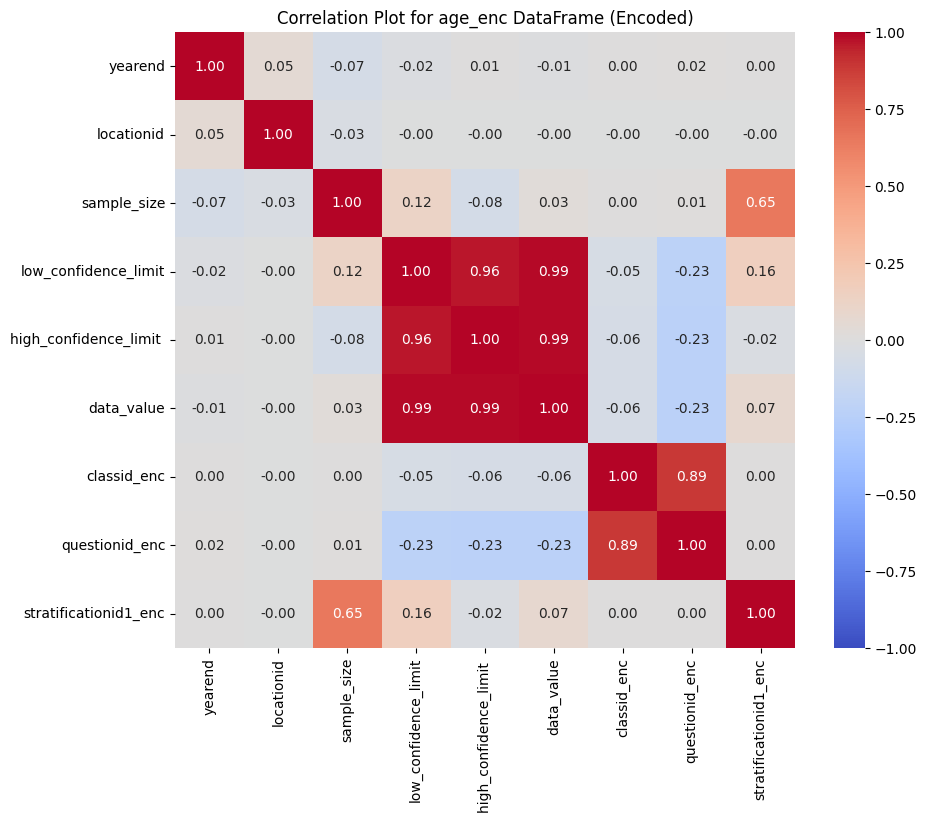

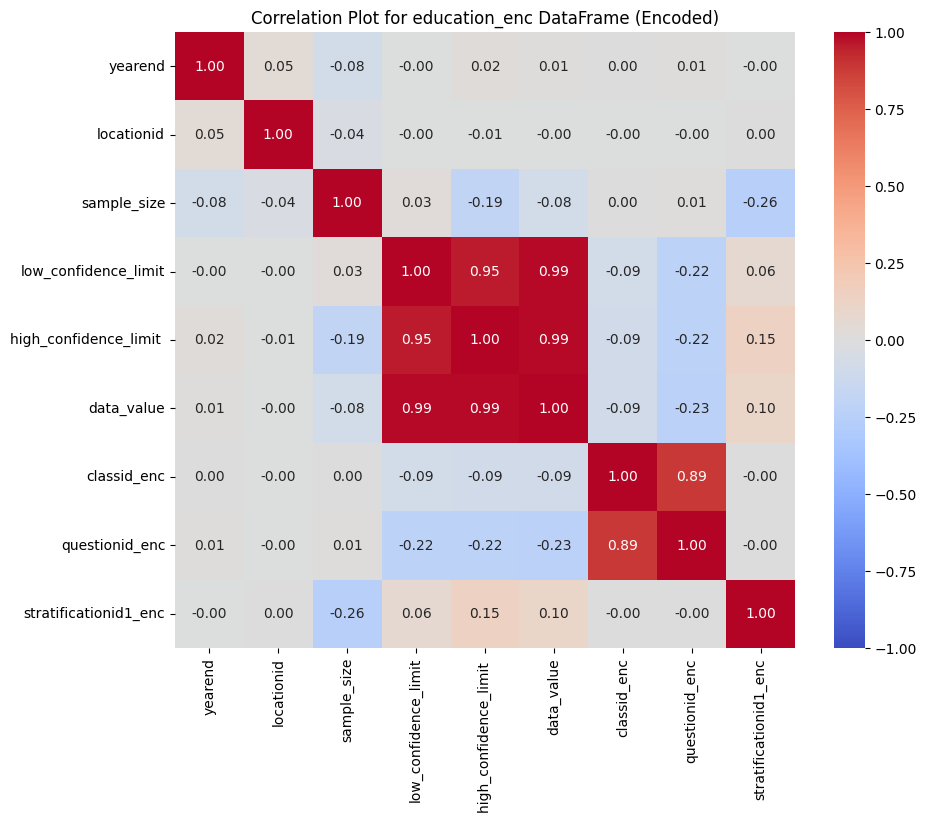

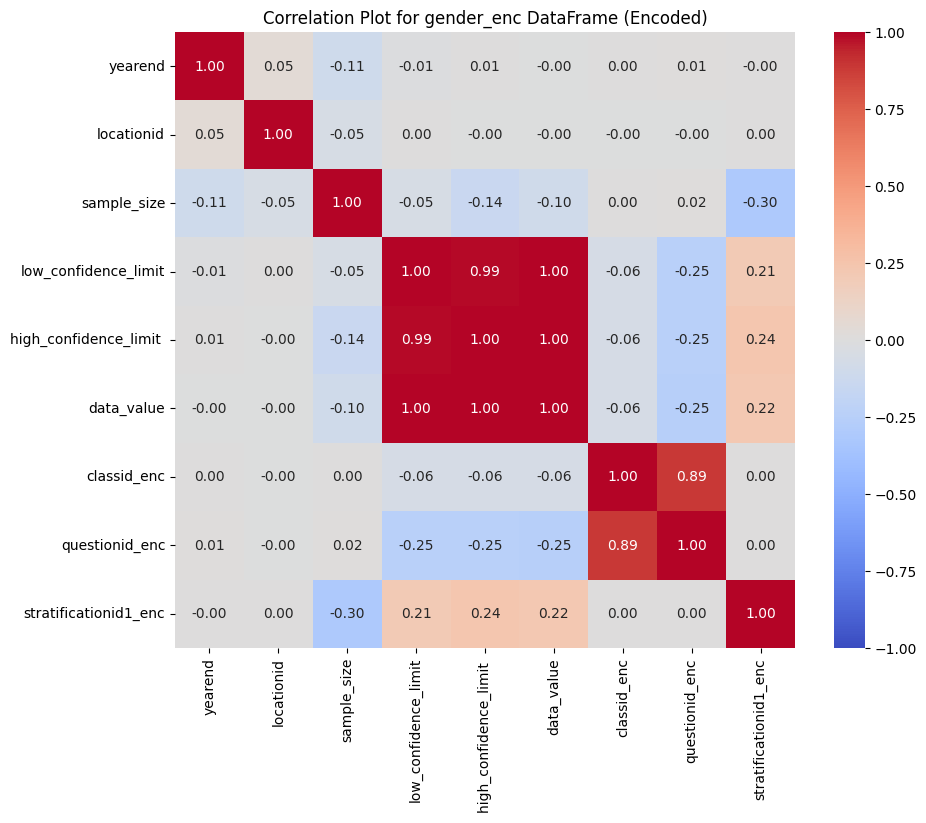

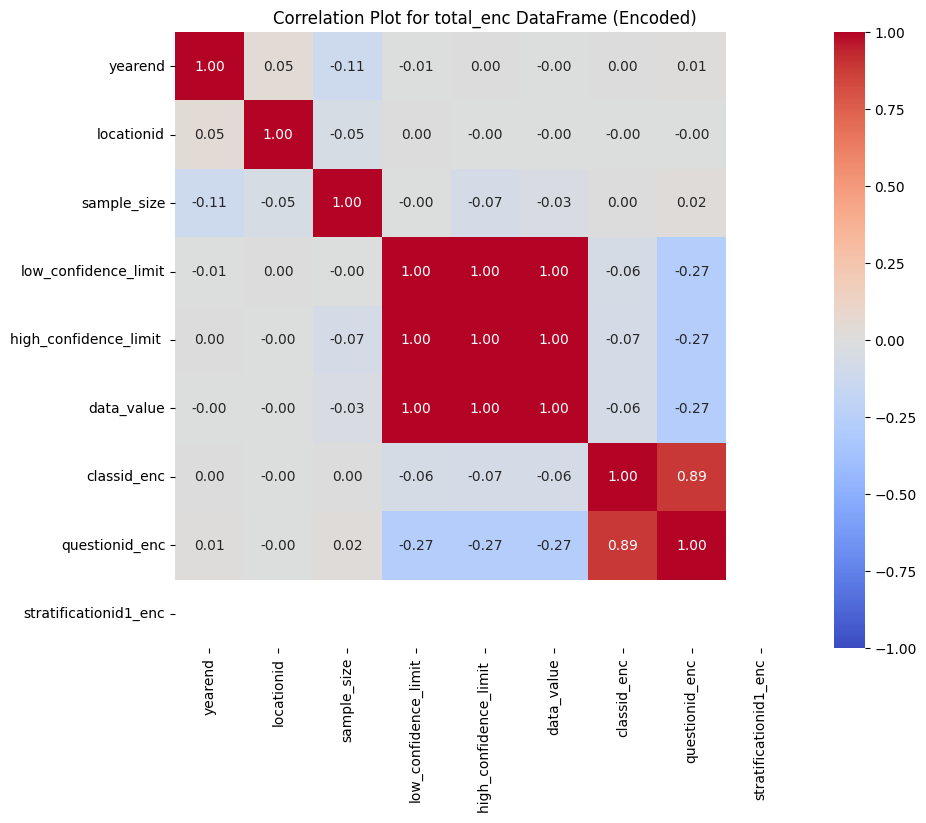

In [526]:
for category, df in encoded_dataframes.items():
    # Compute the correlation matrix
    corr_matrix = df.corr()

    #heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Correlation Plot for {category} DataFrame (Encoded)')
    plt.show()

Given that our target variable is 'data_value,' we have examined its correlation with all other attributes using heatmap visualizations. Across all these heatmaps, we have made a consistent observation.

The attributes 'low_confidence_limit' and 'high_confidence_limit' exhibit a notably high positive correlation. This is expected since they are related as derivative values. Furthermore, 'data_value' inherently lies within the range defined by these confidence limits.

Consequently, it is advisable not to include both 'low_confidence_limit' and 'high_confidence_limit' as features for prediction, as their presence in the model may lead to overfitting and potentially incorrect predictions.

We intend to utilize the insights gained from these heatmap analyses for our subsequent feature selection processes in various machine learning modeling tasks.
